# KAGGLE DATA

## We tried to see if Inflation, Unemployment, and Healthcare affect USA GDP growth. The model says they don’t have a strong or clear effect in this dataset. Inputs are independent, errors are okay, but the prediction is not very accurate.

In [14]:
import zipfile
import pandas as pd

# Unzip the archive
with zipfile.ZipFile("/content/archive.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/archive_data")

# List files inside
import os
os.listdir("/content/archive_data")

['country_comparison_large_dataset.csv']

In [19]:
import pandas as pd # → helps us handle tables of data (like Excel spreadsheets)
import statsmodels.api as sm # → allows us to do regression (to see how numbers affect other numbers)
from statsmodels.stats.outliers_influence import variance_inflation_factor # → checks if your “inputs” are too similar (multicollinearity)
from statsmodels.stats.diagnostic import het_breuschpagan # → checks if errors in the regression are uneven (heteroskedasticity)
import matplotlib.pyplot as plt # → helps us draw graphs

# Load dataset
file_path = "/content/archive_data/country_comparison_large_dataset.csv"
df = pd.read_csv(file_path) # reads the CSV file into a table called df so here df as a big spreadsheet in Python

# Preview dataset
print(df.head()) # just shows the first 5 rows of the table so you can see what the data looks like

  Country  Year  GDP (in Trillions USD)  GDP per Capita (in USD)  \
0     USA  2000                   20.87                  65455.0   
1  Russia  2000                    1.64                  10923.0   
2  Canada  2000                    1.65                  47932.0   
3   China  2000                   13.64                  10060.0   
4   India  2000                    2.98                   2102.1   

   Inflation Rate (%)  Population (in Millions)  Population Growth Rate (%)  \
0                2.28                    330.34                        0.58   
1                3.25                    141.81                        0.10   
2                1.96                     36.63                        0.90   
3                2.43                   1446.93                        0.31   
4                4.87                   1313.76                        1.04   

   Urban Population (%)  Life Expectancy (Years)  \
0                 83.42                    78.39   
1           

   Country  Year  GDP (in Trillions USD)  GDP per Capita (in USD)  \
0      USA  2000                   20.87                  65455.0   
6      USA  2001                   22.01                  66365.0   
12     USA  2002                   21.17                  67470.0   
18     USA  2003                   20.55                  62010.0   
24     USA  2004                   21.43                  67665.0   

    Inflation Rate (%)  Population (in Millions)  Population Growth Rate (%)  \
0                 2.28                    330.34                        0.58   
6                 2.25                    342.58                        0.62   
12                2.28                    343.58                        0.57   
18                2.24                    345.89                        0.62   
24                2.21                    333.98                        0.59   

    Urban Population (%)  Life Expectancy (Years)  \
0                  83.42                    78.39  

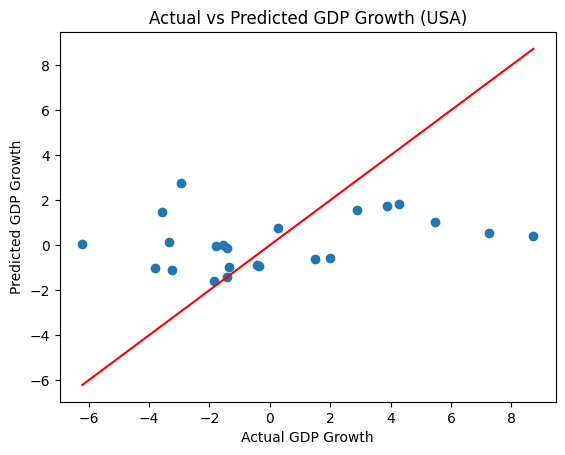

In [21]:


# Select country and year you want (for simplicity, we can filter by one country, e.g., USA)
df_usa = df[df['Country'] == 'USA']
print(df_usa.head())

# Dependent variable: GDP growth (or just GDP if growth is not given)
# If you want to calculate GDP growth from 'GDP (in Trillions USD)':
df_usa = df_usa.sort_values('Year')
df_usa['GDP_Growth'] = df_usa['GDP (in Trillions USD)'].pct_change() * 100 # shows how much the GDP increased or decreased each year.

# X → what we think might affect GDP growth (inputs)
# y → what we want to predict (output)
# add_constant → adds a starting point for the regression so it can calculate an intercept

# Independent variables
X = df_usa[['Inflation Rate (%)', 'Unemployment Rate (%)', 'Healthcare Expenditure per Capita (USD)']] # → X are the inputs/predictors for the regression
X = sm.add_constant(X) # add_constant adds a column of 1s (intercept) so the regression can calculate a starting point.

# Dependent variable
y = df_usa['GDP_Growth'] # → y is what we are trying to predict – the GDP growth.

# Drop NA from pct_change()
X = X.iloc[1:] # remove that first row so regression doesn’t get confused
y = y.iloc[1:]

# Build OLS regression
model = sm.OLS(y, X).fit() # Ordinary Least Squares → the math method for linear regression and .fit() tells Python to learn the relationship between X and y
print(model.summary()) # resulting

# Multicollinearity check
vif_data = pd.DataFrame() # checking if any inputs are too similar
vif_data['feature'] = X.columns # VIF < 5 → okay; VIF > 10 → problematic.
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF values:")
print(vif_data)

# Heteroskedasticity check
bp_test = het_breuschpagan(model.resid, model.model.exog) # checks if the errors (residuals) are evenly spread.
labels = ['LM statistic', 'p-value', 'f-value', 'f p-value'] # looking at the p-value where 0.05 → errors are fine and <0.05 → problems with variance
print("\nBreusch-Pagan test for heteroskedasticity:")
print(dict(zip(labels, bp_test)))

# Plot actual vs predicted
df_usa = df_usa.iloc[1:]  # match rows
df_usa['predicted_GDP_Growth'] = model.predict(X) # calculates the predicted GDP growth using the regression model adding it as a new column

plt.scatter(df_usa['GDP_Growth'], df_usa['predicted_GDP_Growth']) # actual vs predicted GDP growth
plt.plot([df_usa['GDP_Growth'].min(), df_usa['GDP_Growth'].max()],
         [df_usa['GDP_Growth'].min(), df_usa['GDP_Growth'].max()], color='red') # where red line is Perfect prediction line (y=x)
plt.xlabel("Actual GDP Growth")
plt.ylabel("Predicted GDP Growth")
plt.title("Actual vs Predicted GDP Growth (USA)")
plt.show()


                            OLS Regression Results                            
Dep. Variable:             GDP_Growth   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.9771
Date:                Mon, 15 Dec 2025   Prob (F-statistic):              0.484
Time:                        12:48:42   Log-Likelihood:                -55.131
No. Observations:                  22   AIC:                             126.3
Df Residuals:                      14   BIC:                             135.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

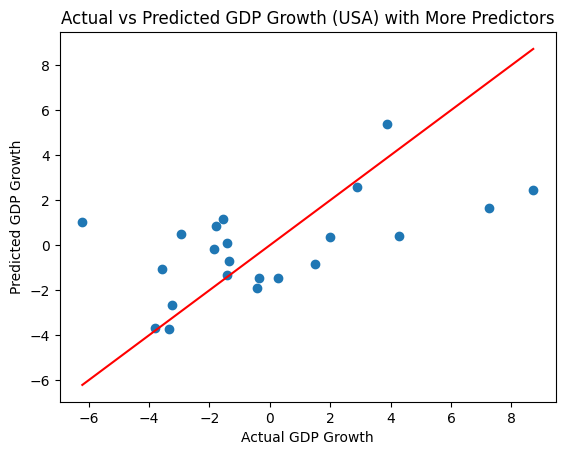

In [22]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/archive_data/country_comparison_large_dataset.csv"
df = pd.read_csv(file_path)

# Filter for USA
df_usa = df[df['Country'] == 'USA'].sort_values('Year')

# Calculate GDP growth (%)
df_usa['GDP_Growth'] = df_usa['GDP (in Trillions USD)'].pct_change() * 100

# Add lagged GDP growth (previous year)
df_usa['GDP_Growth_Lag1'] = df_usa['GDP_Growth'].shift(1)

# Select predictors (including more variables)
predictors = [
    'Inflation Rate (%)',
    'Unemployment Rate (%)',
    'Healthcare Expenditure per Capita (USD)',
    'Population Growth Rate (%)',
    'Urban Population (%)',
    'Corruption Perception Index',
    'GDP_Growth_Lag1'
]

X = df_usa[predictors]
X = sm.add_constant(X)  # Add intercept
y = df_usa['GDP_Growth']

# Drop first row due to NA from pct_change() and lag
X = X.iloc[2:]
y = y.iloc[2:]

# Build OLS regression
model = sm.OLS(y, X).fit()
print(model.summary())

# Multicollinearity check
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF values:")
print(vif_data)

# Heteroskedasticity check
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM statistic', 'p-value', 'f-value', 'f p-value']
print("\nBreusch-Pagan test for heteroskedasticity:")
print(dict(zip(labels, bp_test)))

# Plot actual vs predicted
df_usa = df_usa.iloc[2:]  # match rows
df_usa['predicted_GDP_Growth'] = model.predict(X)

plt.scatter(df_usa['GDP_Growth'], df_usa['predicted_GDP_Growth'])
plt.plot([df_usa['GDP_Growth'].min(), df_usa['GDP_Growth'].max()],
         [df_usa['GDP_Growth'].min(), df_usa['GDP_Growth'].max()], color='red')
plt.xlabel("Actual GDP Growth")
plt.ylabel("Predicted GDP Growth")
plt.title("Actual vs Predicted GDP Growth (USA) with More Predictors")
plt.show()


In [23]:
# Select main predictors
X_simple = df_usa[['Inflation Rate (%)', 'Unemployment Rate (%)', 'GDP_Growth_Lag1']]
X_simple = sm.add_constant(X_simple)  # add intercept

# Dependent variable
y_simple = df_usa['GDP_Growth']

# Drop first row if needed (from pct_change)
X_simple = X_simple.iloc[1:]
y_simple = y_simple.iloc[1:]

# Build OLS regression with simpler model
model_simple = sm.OLS(y_simple, X_simple).fit()
print(model_simple.summary())

# VIF check
vif_simple = pd.DataFrame()
vif_simple['feature'] = X_simple.columns
vif_simple['VIF'] = [variance_inflation_factor(X_simple.values, i) for i in range(X_simple.shape[1])]
print("\nVIF values (simple model):")
print(vif_simple)


                            OLS Regression Results                            
Dep. Variable:             GDP_Growth   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                 -0.064
Method:                 Least Squares   F-statistic:                    0.6012
Date:                Mon, 15 Dec 2025   Prob (F-statistic):              0.623
Time:                        12:51:08   Log-Likelihood:                -55.694
No. Observations:                  21   AIC:                             119.4
Df Residuals:                      17   BIC:                             123.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.05

                            OLS Regression Results                            
Dep. Variable:             GDP_Growth   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     5.584
Date:                Mon, 15 Dec 2025   Prob (F-statistic):           1.31e-05
Time:                        12:53:55   Log-Likelihood:                -346.40
No. Observations:                 132   AIC:                             708.8
Df Residuals:                     124   BIC:                             731.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

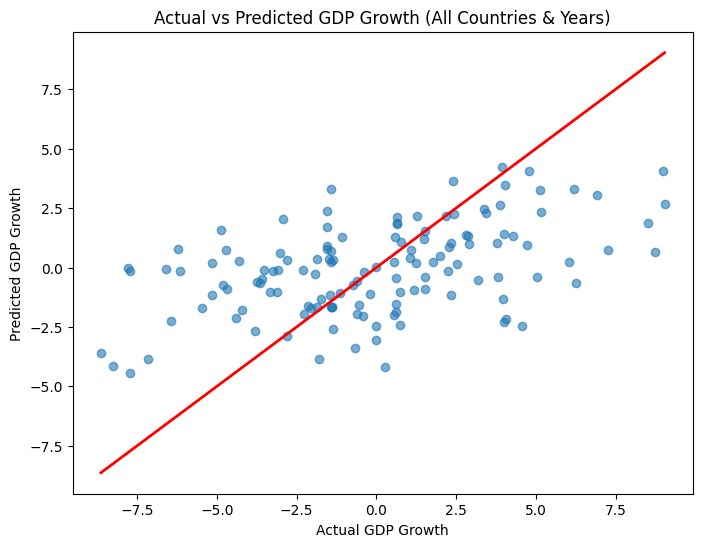

In [24]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/archive_data/country_comparison_large_dataset.csv"
df = pd.read_csv(file_path)

# Sort by country and year
df = df.sort_values(['Country', 'Year']).reset_index(drop=True)

# Calculate GDP growth per country
df['GDP_Growth'] = df.groupby('Country')['GDP (in Trillions USD)'].pct_change() * 100

# Create lagged GDP growth (1-year lag)
df['GDP_Growth_Lag1'] = df.groupby('Country')['GDP_Growth'].shift(1)

# Select relevant predictors (inputs)
predictors = [
    'Inflation Rate (%)',
    'Unemployment Rate (%)',
    'Healthcare Expenditure per Capita (USD)',
    'Population Growth Rate (%)',
    'Urban Population (%)',
    'Corruption Perception Index',
    'GDP_Growth_Lag1'
]

X = df[predictors]
y = df['GDP_Growth']

# Drop rows with NA values (first year of each country)
X = sm.add_constant(X)
X = X.dropna()
y = y.loc[X.index]

# Build improved OLS regression
model = sm.OLS(y, X).fit()
print(model.summary())

# Check multicollinearity
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF values:")
print(vif_data)

# Check heteroskedasticity
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM statistic', 'p-value', 'f-value', 'f p-value']
print("\nBreusch-Pagan test for heteroskedasticity:")
print(dict(zip(labels, bp_test)))

# Predict GDP growth
df = df.loc[X.index]  # match rows
df['predicted_GDP_Growth'] = model.predict(X)

# Plot actual vs predicted GDP growth
plt.figure(figsize=(8,6))
plt.scatter(df['GDP_Growth'], df['predicted_GDP_Growth'], alpha=0.6)
plt.plot([df['GDP_Growth'].min(), df['GDP_Growth'].max()],
         [df['GDP_Growth'].min(), df['GDP_Growth'].max()],
         color='red', linewidth=2)  # perfect prediction line
plt.xlabel("Actual GDP Growth")
plt.ylabel("Predicted GDP Growth")
plt.title("Actual vs Predicted GDP Growth (All Countries & Years)")
plt.show()


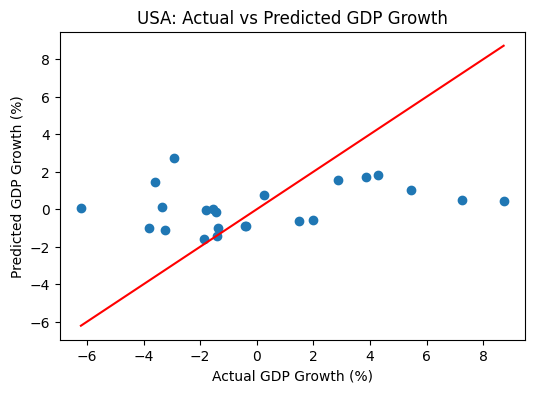

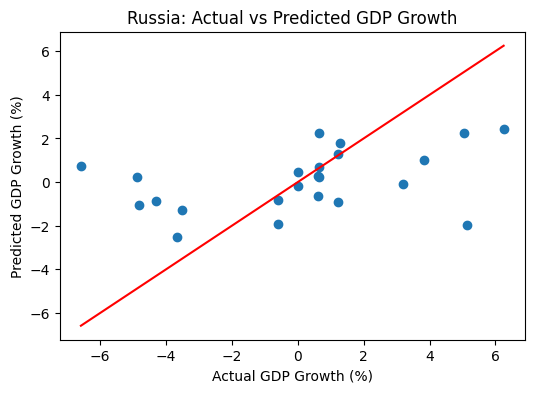

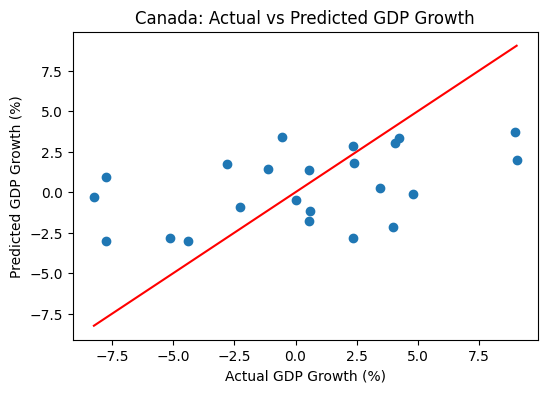

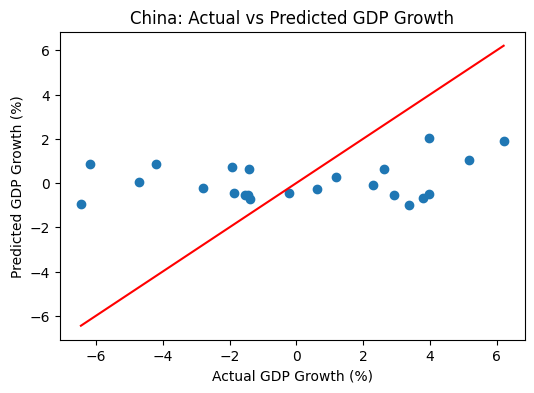

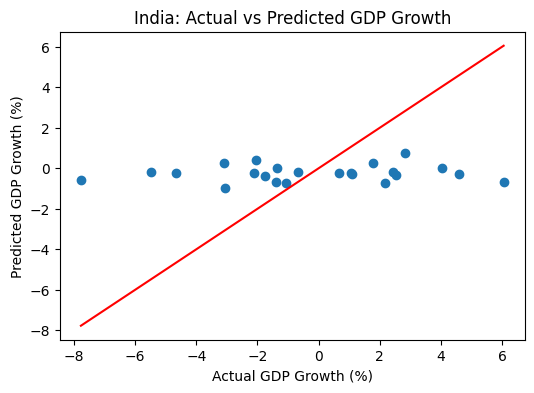

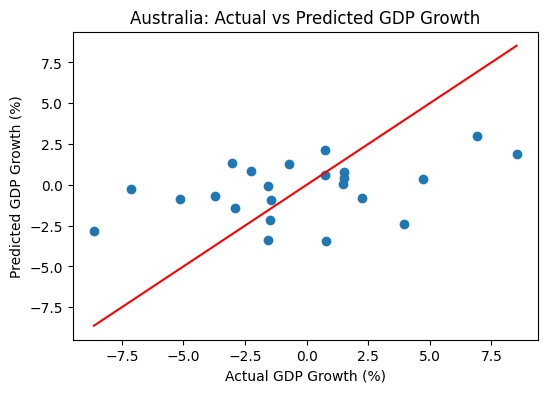

     Country  R_squared  Adj_R_squared  \
0        USA   0.095628      -0.047168   
1     Russia   0.165218       0.033410   
2     Canada   0.217289       0.093703   
3      China   0.055495      -0.093638   
4      India   0.013758      -0.141965   
5  Australia   0.182862       0.053840   

                                            p_values  \
0  {'const': 0.21867485589179086, 'Inflation Rate...   
1  {'const': 0.22106292247044493, 'Inflation Rate...   
2  {'const': 0.5322951105283229, 'Inflation Rate ...   
3  {'const': 0.3745687241320773, 'Inflation Rate ...   
4  {'const': 0.7002084677369009, 'Inflation Rate ...   
5  {'const': 0.35027205863270783, 'Inflation Rate...   

                                                 VIF  BP_p_value  
0  {'const': 5870.690889557888, 'Inflation Rate (...    0.219123  
1  {'const': 5620.392417286879, 'Inflation Rate (...    0.573020  
2  {'const': 3756.0043758858155, 'Inflation Rate ...    0.316504  
3  {'const': 3445.2722648487597, 'Inflation 

In [17]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt
import os

# Load dataset
file_path = "/content/archive_data/country_comparison_large_dataset.csv"
df = pd.read_csv(file_path)

# List of countries
countries = df['Country'].unique()

# Columns for regression
dep_var = 'GDP_Growth'  # will calculate
indep_vars = ['Inflation Rate (%)', 'Unemployment Rate (%)', 'Healthcare Expenditure per Capita (USD)']

# Scale large variables to avoid numerical instability
df['Healthcare Expenditure per Capita (USD)'] /= 1000  # scale down

# Prepare a summary dataframe
summary_results = []

for country in countries:
    df_country = df[df['Country'] == country].sort_values('Year').copy()

    # Calculate GDP growth (%) from GDP (in Trillions USD)
    df_country['GDP_Growth'] = df_country['GDP (in Trillions USD)'].pct_change() * 100
    df_country = df_country.iloc[1:]  # drop first NA row

    if len(df_country) < 3:
        # skip country if not enough data
        continue

    # Prepare regression
    X = df_country[indep_vars]
    X = sm.add_constant(X)
    y = df_country['GDP_Growth']

    # OLS regression
    model = sm.OLS(y, X).fit()

    # Multicollinearity (VIF)
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Heteroskedasticity (Breusch-Pagan)
    bp_test = het_breuschpagan(model.resid, model.model.exog)
    bp_results = dict(zip(['LM_stat', 'p_value', 'f_value', 'f_p_value'], bp_test))

    # Store summary
    summary_results.append({
        'Country': country,
        'R_squared': model.rsquared,
        'Adj_R_squared': model.rsquared_adj,
        'p_values': model.pvalues.to_dict(),
        'VIF': vif_data.set_index('feature')['VIF'].to_dict(),
        'BP_p_value': bp_results['p_value']
    })

    # Plot actual vs predicted
    df_country['predicted_GDP_Growth'] = model.predict(X)
    plt.figure(figsize=(6,4))
    plt.scatter(df_country['GDP_Growth'], df_country['predicted_GDP_Growth'])
    plt.plot([df_country['GDP_Growth'].min(), df_country['GDP_Growth'].max()],
             [df_country['GDP_Growth'].min(), df_country['GDP_Growth'].max()], color='red')
    plt.xlabel("Actual GDP Growth (%)")
    plt.ylabel("Predicted GDP Growth (%)")
    plt.title(f"{country}: Actual vs Predicted GDP Growth")
    plt.show()

# Convert summary to DataFrame
summary_df = pd.DataFrame(summary_results)
print(summary_df)
